In [36]:
import pandas as pd
import numpy as np
import gzip
import re
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
sbn.set(style='white', font_scale=1.5)
from scipy import stats

In [3]:
# human transcriptome bed file
## source: UCSC table browser
## http://genome.ucsc.edu/cgi-bin/hgTables?hgsid=698225799_VBVYkJAZFNjxKaJnafKIkQY9ZcPB&boolshad.hgta_printCustomTrackHeaders=0&hgta_ctName=tb_ncbiRefSeq&hgta_ctDesc=table+browser+query+on+ncbiRefSeq&hgta_ctVis=pack&hgta_ctUrl=&fbQual=whole&fbUpBases=200&fbExonBases=0&fbIntronBases=0&fbDownBases=200&hgta_doGetBed=get+BED
with gzip.open('../raw_data/transcriptome/hg19_allTranscriptome.bed.gz', 'tr') as handle:
    dfHT = pd.read_csv(handle, sep='\t', header=-1)

# Outrank the haplotype chromosomes
dfHT = dfHT[~dfHT[0].str.contains('_')]
dfHT = dfHT.sort_values(by=0).reset_index(drop=True)
# Eliminate the redundant refSeq name, keep the first record (They should be the most common ones after outrank the haplotype chromosomes)
dfHT = dfHT.groupby(3, as_index=False).first().reset_index(drop=True)
dfHT.head()

,3,0,1,2,4,5,6,7,8,9,10,11
0,NM_000014.5,chr12,9220303,9268825,0,-,9220418,9268445,0,36,"132,42,103,69,91,128,219,224,181,75,157,88,177...","0,475,1032,2037,2780,4651,4945,6852,9048,9638,..."
1,NM_000015.2,chr8,18248754,18258723,0,+,18257513,18258386,0,2,"101,1216,","0,8753,"
2,NM_000016.5,chr1,76190031,76229364,0,+,76190472,76228448,0,12,"471,88,98,70,101,81,131,109,141,96,249,988,","0,4054,8297,8506,9181,10444,15633,21459,25072,..."
3,NM_000017.3,chr12,121163540,121177811,0,+,121163688,121177251,0,10,"194,164,150,112,152,171,138,96,57,713,","0,1288,11248,11618,12099,12542,12795,13082,134..."
4,NM_000018.3,chr17,7123149,7128586,0,+,7123303,7128416,0,20,"216,76,66,73,65,135,145,130,126,199,105,87,63,...","0,291,633,773,935,1093,1707,2121,2346,2836,330..."


In [4]:
## 
def picktss(x):
    if re.match('\+', x[5]):
        return x[1]
    elif re.match('\-', x[5]):
        return x[2]-1
    else:
        print('Problematic TSS')
        return None
dfHT['TSS'] = dfHT.apply(lambda x: picktss(x), axis=1)
dfHT['TSS1'] = dfHT['TSS']+1
dfTSS = dfHT[[0, 'TSS', 'TSS1'] + list(range(3,12))]
dfTSS.head()

,0,TSS,TSS1,3,4,5,6,7,8,9,10,11
0,chr12,9268824,9268825,NM_000014.5,0,-,9220418,9268445,0,36,"132,42,103,69,91,128,219,224,181,75,157,88,177...","0,475,1032,2037,2780,4651,4945,6852,9048,9638,..."
1,chr8,18248754,18248755,NM_000015.2,0,+,18257513,18258386,0,2,"101,1216,","0,8753,"
2,chr1,76190031,76190032,NM_000016.5,0,+,76190472,76228448,0,12,"471,88,98,70,101,81,131,109,141,96,249,988,","0,4054,8297,8506,9181,10444,15633,21459,25072,..."
3,chr12,121163540,121163541,NM_000017.3,0,+,121163688,121177251,0,10,"194,164,150,112,152,171,138,96,57,713,","0,1288,11248,11618,12099,12542,12795,13082,134..."
4,chr17,7123149,7123150,NM_000018.3,0,+,7123303,7128416,0,20,"216,76,66,73,65,135,145,130,126,199,105,87,63,...","0,291,633,773,935,1093,1707,2121,2346,2836,330..."


In [35]:
window = 2000
dfTSS.loc[:, 'TSS'] = dfTSS['TSS']-2000
dfTSS.loc[:, 'TSS1'] = dfTSS['TSS1']+500-1
dfTSS = dfTSS.sort_values(by=[0, 'TSS'], ascending=True).reset_index(drop=True)

with gzip.open('../raw_data/transcriptome/hg19_allTSS_2000up_500down.bed.gz', 'tw') as handle:
    dfTSS.to_csv(handle, header=False, index=False, sep='\t')

/home/james/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
with gzip.open('../raw_data/transcriptome/hg19_allTSS.bed.gz', 'tr') as handle:
    dfTSS = pd.read_csv(handle, header=-1)
dfTSS.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,11673,12073,NR_046018.2,0,+,14409,14409,0,3,"354,109,1189,","0,739,1347,"
1,chr1,17235,17635,NR_106918.1,0,-,17436,17436,0,1,"68,","0,"
2,chr1,29169,29569,NR_024540.1,0,-,29370,29370,0,11,"468,69,152,159,198,136,137,147,99,154,50,","0,608,1434,2245,2496,2871,3244,3553,3906,10376..."
3,chr1,30165,30565,NR_036051.1,0,+,30503,30503,0,1,"138,","0,"
4,chr1,35880,36280,NR_026818.1,0,-,36081,36081,0,3,"564,205,361,","0,666,1110,"


In [5]:
housekeep = pd.read_csv('../raw_data/transcriptome/HK_genes.txt', sep='\t', header=-1)
housekeep.columns = ['symbol', 'refseq']
housekeep.head()

,symbol,refseq
0,AAAS,NM_015665
1,AAGAB,NM_024666
2,AAMP,NM_001087
3,AAR2,NM_015511
4,AARS,NM_001605


In [32]:
dfU2Dseq = pd.read_csv('../raw_data/transcriptome/U2OS_TSS_DNaseSeq.csv', index_col=0)
dfHEKDseq = pd.read_csv('../raw_data/transcriptome/HEK_TSS_2000up_500down_DNaseSeq.csv', index_col=0)

In [46]:
dfExpHEK = pd.read_csv('../raw_data/transcriptome/HEK/paired/SRR3997505/abundance.tsv', sep='\t')
dfExpU2  = pd.read_csv('../raw_data/transcriptome/U2OS/ERR191523_trimmed/ERR191523/abundance.tsv', sep='\t')
dfExpU2['ref'] = dfExpU2['target_id'].str.strip('|').str.strip('ref|')
dfExpHEK['ref'] = dfExpHEK['target_id'].str.strip('|').str.strip('ref|')

# Take out zeros
dfExpU2 = dfExpU2[dfExpU2['tpm']>5]
dfExpHEK = dfExpHEK[dfExpHEK['tpm']>5]

# Pick mRNA NM_
dfExpU2 = dfExpU2[dfExpU2['ref'].str.contains('NM_')]
dfExpHEK = dfExpHEK[dfExpHEK['ref'].str.contains('NM_')]

# Pick housekeeping genes
dfHEKhouse = dfExpHEK[dfExpHEK['ref'].apply(lambda x: x.split('.')[0]).isin(housekeep['refseq'])]
dfU2house = dfExpU2[dfExpU2['ref'].apply(lambda x: x.split('.')[0]).isin(housekeep['refseq'])]

In [37]:
dfExpMerge = pd.merge(left=dfExpHEK, right=dfExpU2, on='ref', how='inner')
dfExpMerge['logTPMHEK'] = dfExpMerge['tpm_x'].map(np.log10)
dfExpMerge['logTPMU2'] = dfExpMerge['tpm_y'].map(np.log10)
dfExpMerge.head()

,target_id_x,length_x,eff_length_x,est_counts_x,tpm_x,ref,target_id_y,length_y,eff_length_y,est_counts_y,tpm_y,logTPMHEK,logTPMU2
0,ref|NM_015658.3|,2817,2648.45,11569.90,102.7530,NM_015658.3,ref|NM_015658.3|,2817,2717.0,7988.99,54.98710,2.011795,1.740261
1,ref|NM_005101.3|,685,516.45,358.00,16.3046,NM_005101.3,ref|NM_005101.3|,685,585.0,324.00,10.35730,1.212310,1.015247
2,ref|NM_198576.3|,7343,7174.45,6310.60,20.6889,NM_198576.3,ref|NM_198576.3|,7343,7243.0,19153.00,49.45120,1.315737,1.694177
3,ref|NM_016176.3|,2051,1882.45,4429.73,55.3490,NM_016176.3,ref|NM_016176.3|,2051,1951.0,5424.55,51.99540,1.743110,1.715965
4,ref|NM_080605.3|,2793,2624.45,2520.00,22.5849,NM_080605.3,ref|NM_080605.3|,2793,2693.0,756.00,5.24981,1.353818,0.720144


In [48]:
dfHouseMerge = pd.merge(left=dfHEKhouse, right=dfU2house, on='ref', how='inner')
dfHouseMerge.head()

,target_id_x,length_x,eff_length_x,est_counts_x,tpm_x,ref,target_id_y,length_y,eff_length_y,est_counts_y,tpm_y
0,ref|NM_015658.3|,2817,2648.45,11569.90,102.7530,NM_015658.3,ref|NM_015658.3|,2817,2717.0,7988.99,54.98710
1,ref|NM_016176.3|,2051,1882.45,4429.73,55.3490,NM_016176.3,ref|NM_016176.3|,2051,1951.0,5424.55,51.99540
2,ref|NM_080605.3|,2793,2624.45,2520.00,22.5849,NM_080605.3,ref|NM_080605.3|,2793,2693.0,756.00,5.24981
3,ref|NM_058167.2|,2267,2098.45,1734.89,19.4459,NM_058167.2,ref|NM_058167.2|,2267,2167.0,1741.94,15.03250
4,ref|NM_017871.5|,2168,1999.45,2474.08,29.1043,NM_017871.5,ref|NM_017871.5|,2168,2068.0,2717.43,24.57350


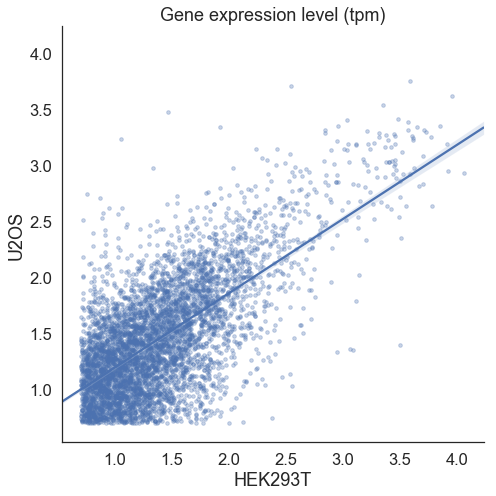

In [107]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
#ax.plot(dfHouseMerge['tpm_x'].map(np.log10), dfHouseMerge['tpm_y'].map(np.log10), 'o')

sbn.regplot(x='logTPMHEK', y='logTPMU2', data=dfExpMerge, scatter_kws={'alpha':0.3, 's': 13})
sbn.despine()
ax.set_xlabel('HEK293T')
ax.set_ylabel('U2OS')
ax.set_ylim(ax.get_xlim())
ax.set_title('Gene expression level (tpm)')
fig.tight_layout()
fig.savefig('../paper_figures/20181216_GeneExp_HEK_U2_RegPlot.png', dpi=600)

In [38]:
dfExpMerge.corr()

,length_x,eff_length_x,est_counts_x,tpm_x,length_y,eff_length_y,est_counts_y,tpm_y,logTPMHEK,logTPMU2
length_x,1.000000,1.000000,-0.048839,-0.163188,1.000000,1.000000,0.053910,-0.155035,-0.400752,-0.221823
eff_length_x,1.000000,1.000000,-0.048835,-0.163173,1.000000,1.000000,0.053911,-0.155029,-0.400743,-0.221818
est_counts_x,-0.048839,-0.048835,1.000000,0.726131,-0.048839,-0.048839,0.715772,0.729895,0.567881,0.450621
tpm_x,-0.163188,-0.163173,0.726131,1.000000,-0.163188,-0.163188,0.302255,0.642053,0.561672,0.410186
length_y,1.000000,1.000000,-0.048839,-0.163188,1.000000,1.000000,0.053910,-0.155035,-0.400752,-0.221823
eff_length_y,1.000000,1.000000,-0.048839,-0.163188,1.000000,1.000000,0.053910,-0.155035,-0.400752,-0.221823
est_counts_y,0.053910,0.053911,0.715772,0.302255,0.053910,0.053910,1.000000,0.779361,0.332011,0.508064
tpm_y,-0.155035,-0.155029,0.729895,0.642053,-0.155035,-0.155035,0.779361,1.000000,0.537246,0.622624
logTPMHEK,-0.400752,-0.400743,0.567881,0.561672,-0.400752,-0.400752,0.332011,0.537246,1.000000,0.673095
logTPMU2,-0.221823,-0.221818,0.450621,0.410186,-0.221823,-0.221823,0.508064,0.622624,0.673095,1.000000


In [51]:
dfExpMerge.corr()

,length_x,eff_length_x,est_counts_x,tpm_x,length_y,eff_length_y,est_counts_y,tpm_y
length_x,1.000000,1.000000,-0.048839,-0.163188,1.000000,1.000000,0.053910,-0.155035
eff_length_x,1.000000,1.000000,-0.048835,-0.163173,1.000000,1.000000,0.053911,-0.155029
est_counts_x,-0.048839,-0.048835,1.000000,0.726131,-0.048839,-0.048839,0.715772,0.729895
tpm_x,-0.163188,-0.163173,0.726131,1.000000,-0.163188,-0.163188,0.302255,0.642053
length_y,1.000000,1.000000,-0.048839,-0.163188,1.000000,1.000000,0.053910,-0.155035
eff_length_y,1.000000,1.000000,-0.048839,-0.163188,1.000000,1.000000,0.053910,-0.155035
est_counts_y,0.053910,0.053911,0.715772,0.302255,0.053910,0.053910,1.000000,0.779361
tpm_y,-0.155035,-0.155029,0.729895,0.642053,-0.155035,-0.155035,0.779361,1.000000


In [52]:
dfHEKDseq.head()

,chr,bStart,bEnd,name,score,strand,6,7,8,9,10,11,sumCov,normed_sumCov
0,chr1,9873,12373,NR_046018.2,0,+,14409,14409,0,3,"354,109,1189,","0,739,1347,",3720,0.006805
1,chr1,15435,17935,NR_106918.1,0,-,17436,17436,0,1,"68,","0,",700,0.001280
2,chr1,27369,29869,NR_024540.1,0,-,29370,29370,0,11,"468,69,152,159,198,136,137,147,99,154,50,","0,608,1434,2245,2496,2871,3244,3553,3906,10376...",1562,0.002857
3,chr1,28365,30865,NR_036051.1,0,+,30503,30503,0,1,"138,","0,",9507,0.017391
4,chr1,34080,36580,NR_026818.1,0,-,36081,36081,0,3,"564,205,361,","0,666,1110,",2242,0.004101


In [59]:
dfExpMerge.shape

(5331, 11)

In [55]:
cols = list(dfHEKDseq.columns)

cols = cols[:4] + cols[-2:]
cols

['chr', 'bStart', 'bEnd', 'name', 'sumCov', 'normed_sumCov']

In [72]:
dfHEKDseq_tight = dfHEKDseq[cols]
dfHEKfinal = pd.merge(left=dfHEKDseq_tight, right=dfExpMerge, left_on='name', right_on='ref', how='inner')
dfHEKfinal = dfHEKfinal[dfHEKfinal['normed_sumCov']>0]
dfHEKfinal['log_normSumCov'] = dfHEKfinal['normed_sumCov'].map(np.log10)
dfHEKfinal['log_HEKtpm'] = dfHEKfinal['tpm_x'].map(np.log10)
dfHEKfinal.corr()

,bStart,bEnd,sumCov,normed_sumCov,length_x,eff_length_x,est_counts_x,tpm_x,length_y,eff_length_y,est_counts_y,tpm_y,log_normSumCov,log_HEKtpm
bStart,1.000000,1.000000,-0.128826,-0.128826,0.055221,0.055222,-0.012867,-0.018082,0.055221,0.055221,0.008307,-0.013575,-0.101864,-0.034935
bEnd,1.000000,1.000000,-0.128826,-0.128826,0.055221,0.055222,-0.012867,-0.018082,0.055221,0.055221,0.008307,-0.013575,-0.101864,-0.034935
sumCov,-0.128826,-0.128826,1.000000,1.000000,0.020236,0.020235,-0.011136,-0.028992,0.020236,0.020236,-0.015113,-0.035348,0.887678,0.005357
normed_sumCov,-0.128826,-0.128826,1.000000,1.000000,0.020236,0.020235,-0.011136,-0.028992,0.020236,0.020236,-0.015113,-0.035348,0.887678,0.005357
length_x,0.055221,0.055221,0.020236,0.020236,1.000000,1.000000,-0.042385,-0.163833,1.000000,1.000000,0.062468,-0.159041,0.009917,-0.400155
eff_length_x,0.055222,0.055222,0.020235,0.020235,1.000000,1.000000,-0.042382,-0.163820,1.000000,1.000000,0.062468,-0.159037,0.009915,-0.400147
est_counts_x,-0.012867,-0.012867,-0.011136,-0.011136,-0.042385,-0.042382,1.000000,0.720931,-0.042385,-0.042385,0.751611,0.750752,-0.000963,0.554972
tpm_x,-0.018082,-0.018082,-0.028992,-0.028992,-0.163833,-0.163820,0.720931,1.000000,-0.163833,-0.163833,0.322287,0.678015,-0.019282,0.559861
length_y,0.055221,0.055221,0.020236,0.020236,1.000000,1.000000,-0.042385,-0.163833,1.000000,1.000000,0.062468,-0.159041,0.009917,-0.400155
eff_length_y,0.055221,0.055221,0.020236,0.020236,1.000000,1.000000,-0.042385,-0.163833,1.000000,1.000000,0.062468,-0.159041,0.009917,-0.400155


In [108]:
dfHEKfinal.shape

(5189, 19)

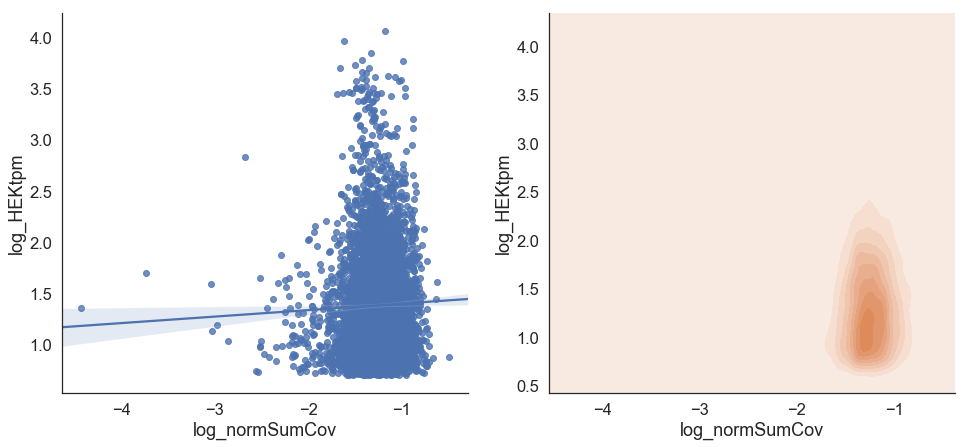

In [84]:
fig, axes = plt.subplots(1,1, figsize=(8,7))
sbn.regplot(x = 'log_normSumCov', y='log_HEKtpm', data=dfHEKfinal, ax = axes[0])
sbn.kdeplot(data=dfHEKfinal['log_normSumCov'], data2=dfHEKfinal['log_HEKtpm'],shade=True, ax= axes[1])
ax.set_xlim(-4,0)
sbn.despine()


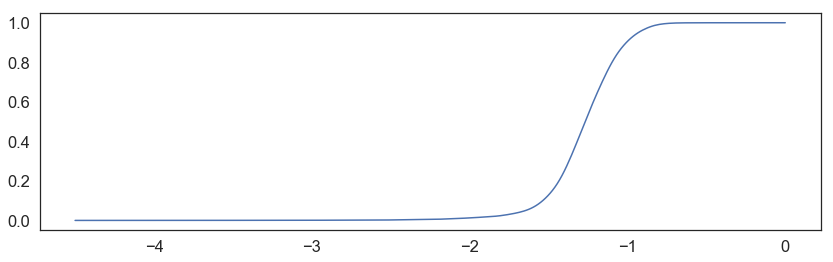

In [95]:
fig ,ax = plt.subplots(1,1, figsize=(14,4))
HEKkde = stats.gaussian_kde(dfHEKfinal['log_normSumCov'])
x = np.linspace(-4.5, 0, 300)
HEK_TSS_pdf = HEKkde.pdf(x)
ax.plot(x, np.cumsum(HEK_TSS_pdf)/np.sum(HEK_TSS_pdf))

In [15]:
dfMatch = pd.merge(left=dfU2Dseq, right=dfExpU2, left_on='name', right_on='ref', how='inner')

dfMatchnoZ = dfMatch[dfMatch['normed_sumCov']>0].reset_index(drop=True)
dfMatchnoZ['log_DNase'] = dfMatchnoZ['normed_sumCov'].map(np.log10)
dfMatchnoZ['log_Exp'] = dfMatchnoZ['tpm'].map(np.log10)

/home/james/anaconda3/lib/python3.6/site-packages/pandas/core/base.py:1004: RuntimeWarning: divide by zero encountered in log10
  new_values = map_f(values, mapper)


In [19]:
U2house = dfMatchnoZ[dfMatchnoZ['name'].apply(lambda x: x.split('.')[0]).isin(housekeep['refseq'])]

(3689, 22)

In [33]:
dfMatchnoZ['normed_sumCov'].min()

3.1258625817794421e-05

In [24]:
dftop5k = dfMatchnoZ.sort_values(by='tpm', ascending=False).iloc[:5000,:].reset_index(drop=True)

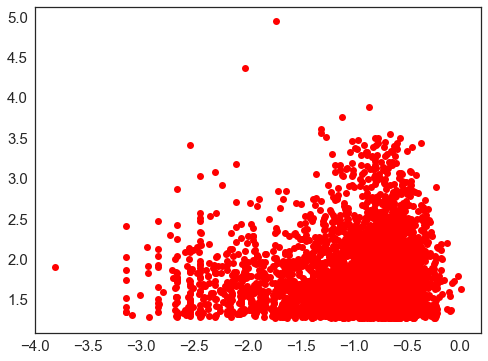

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(dftop5k['normed_sumCov'].map(np.log10), dftop5k['tpm'].map(np.log10), 'ro')

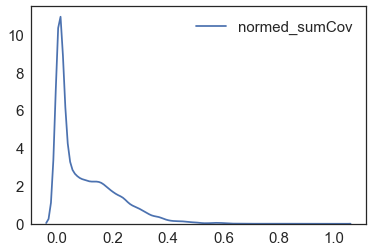

In [17]:
sbn.kdeplot(dfMatch['normed_sumCov'])

(array([  3.45760000e+04,   1.21800000e+04,   6.68600000e+03,
          2.29300000e+03,   6.46000000e+02,   2.25000000e+02,
          4.00000000e+01,   1.80000000e+01,   8.00000000e+00,
          1.30000000e+01]),
 array([ 0.        ,  0.10194376,  0.20388751,  0.30583127,  0.40777503,
         0.50971878,  0.61166254,  0.71360629,  0.81555005,  0.91749381,
         1.01943756]),
 <a list of 10 Patch objects>)

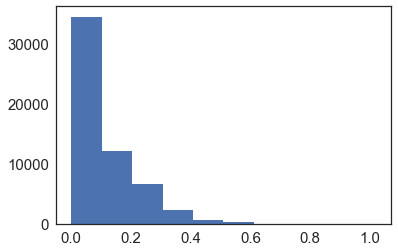

In [20]:
plt.hist(dfMatch['normed_sumCov'])

In [ ]:
dfMatch['normed_sumCov_log'] = dfMatch['normed_sumCov'].map

In [11]:
dfMatch[dfMatch['tpm']>0.0001].corr()

,bStart,bEnd,score,6,7,8,9,sumCov,normed_sumCov,length,eff_length,est_counts,tpm
bStart,1.000000,1.000000,NaN,0.999999,0.999999,NaN,0.025615,-0.062962,-0.062962,0.056400,0.056404,0.005796,-0.006797
bEnd,1.000000,1.000000,NaN,0.999999,0.999999,NaN,0.025615,-0.062962,-0.062962,0.056400,0.056404,0.005796,-0.006797
score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.999999,0.999999,NaN,1.000000,0.999999,NaN,0.025310,-0.062962,-0.062962,0.056105,0.056109,0.005784,-0.006792
7,0.999999,0.999999,NaN,0.999999,1.000000,NaN,0.025934,-0.062990,-0.062990,0.056679,0.056684,0.005782,-0.006809
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.025615,0.025615,NaN,0.025310,0.025934,NaN,1.000000,0.095890,0.095890,0.555333,0.555316,0.048880,-0.011973
sumCov,-0.062962,-0.062962,NaN,-0.062962,-0.062990,NaN,0.095890,1.000000,1.000000,0.036645,0.036579,0.089827,0.011330
normed_sumCov,-0.062962,-0.062962,NaN,-0.062962,-0.062990,NaN,0.095890,1.000000,1.000000,0.036645,0.036579,0.089827,0.011330
length,0.056400,0.056400,NaN,0.056105,0.056679,NaN,0.555333,0.036645,0.036645,1.000000,1.000000,0.046476,-0.025479


In [ ]:
dfExp = pd.read_csv('../raw_data/transcriptome/HEK/SRR3997492/abundance.tsv', sep='\t')
dfExp.head()

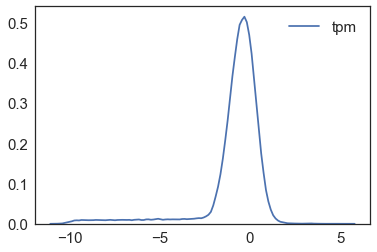

In [42]:
sbn.kdeplot(dfExp[dfExp['tpm']>0]['tpm'].map(np.log10))

In [27]:
dfExp[dfExp['tpm']>0].shape

(81404, 5)

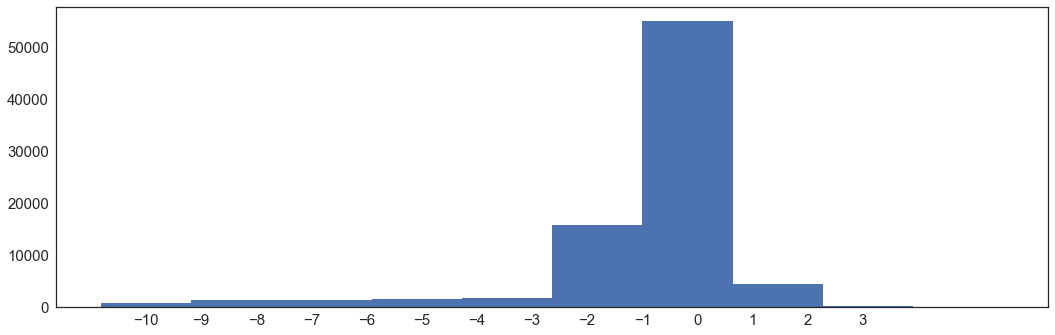

In [43]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
plt.hist(dfExp[dfExp['tpm']>0]['tpm'].map(np.log10))
ax.set_xticks(np.arange(-10,4,1))
fig.tight_layout()

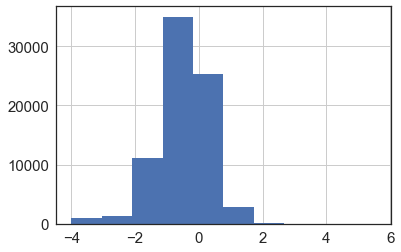

In [17]:
fig, ax
dfExp[(dfExp['tpm']>0) & (dfExp['tpm']>0.0001)]['tpm'].map(np.log10).hist()